In [1]:
from typing import List, Optional, Tuple, Union

import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd

import utils as u
from models import morales2009
from steps import preprocess
from visualization import papermode

papermode(plt, size=12)


In [2]:
def abbrange(letter:str, a:int, b:int)->Tuple[str]:
    return (f"{letter}{i:02}" for i in range(a,b))

In [3]:
d_abbrs = (*abbrange("D", 1, 7), "D09", "D11", "D12", "D13", "D14", "D16", *abbrange("D", 18, 23))
m_abbrs = abbrange("M", 1, 8)
r_abbrs = ("R02", "R03", "R09")
s_abbrs = (*abbrange("S", 1, 11), "S21", "S22", "S23", "S28", "S29", "S30", "S31")

abbrs = (
    *d_abbrs,
    *m_abbrs,
    # *p_abbrs,
    *r_abbrs,
    *s_abbrs,
    # *t_abbrs,
)

colors = u.COLORS
cols = {a: colors[u.get_terrain(a)] for a in abbrs}

# Simple labels
splabs = u.COLORS

# highlighted_abbrs = ("M03", "M04", "M05", "M06")
# highlighted_abbrs = ("S23",)


def add_terrain_legend(mpl_elem: Union[mpl.axes.Axes, mpl.figure.Figure], highlighted: Optional[List[str]] = None):
    legend_handles = [mpatches.Patch(color=col, label=lab) for lab, col in splabs.items()]
    if highlighted is not None:
        legend_handles.extend([mpatches.Patch(color="xkcd:bright red", label=lab) for lab in highlighted])
    # mpl_elem.legend(handles=legend_handles, bbox_to_anchor=(1.05, 0), loc="lower left")
    mpl_elem.legend(
        handles=legend_handles, ncol=len(splabs), bbox_to_anchor=(0.5, -0.03), loc="upper center", title="Terrain"
    )


In [4]:
dfs = {}
for abbr in abbrs:
    preprocess(abbr, verbose=False)
    pentz_df = morales2009.morales2009(abbr, verbose=False);
    dfs[abbr] = pentz_df


D20: 100%|██████████| 109/109 [00:01<00:00, 69.60it/s]
/home/norlab/code/202206/terrain-code/utils/ssmr_utils.py:182: RuntimeWarning: invalid value encountered in double_scalars
  return (measure - theoretical) / theoretical
S31: 100%|██████████| 45/45 [00:00<00:00, 191.15it/s]


In [5]:
model_name = morales2009.__MODEL_NAME__.lower()
figdir = u.get_figdir("summary", subdir=model_name)
model_name = morales2009.__MODEL_NAME__.title()


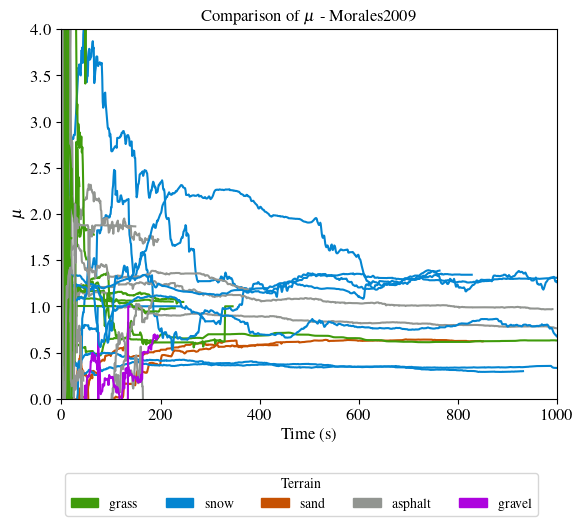

In [6]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    ax.plot(dfs[abbr].time_rel, dfs[abbr].m_sym, col, label=abbr)
ax.set_ylim((0, 4))
ax.set_xlim((0, 1000))
add_terrain_legend(fig)
ax.set_xlabel("Time (s)")
ax.set_ylabel("$\mu$")
ax.set_title(f"Comparison of $\mu$ - {model_name}")

fig.savefig(figdir / f"{model_name}_mu.jpg", bbox_inches="tight")


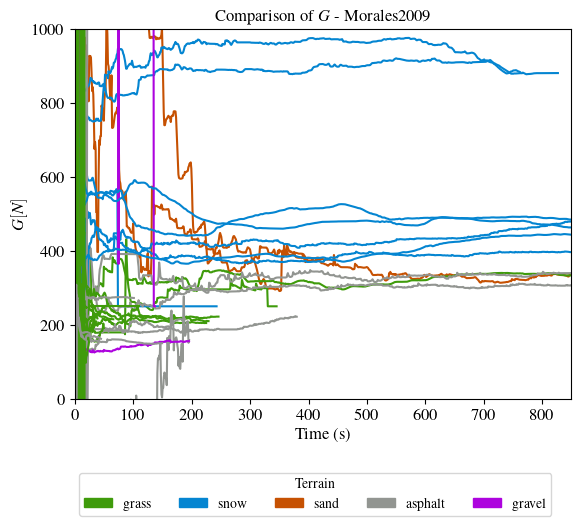

In [7]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    ax.plot(dfs[abbr].time_rel, dfs[abbr].G_sym, col, label=abbr)
ax.set_xlim((0, 850))
ax.set_ylim((0, 1000))
add_terrain_legend(fig)
ax.set_xlabel("Time (s)")
ax.set_ylabel("$G [N]$")
ax.set_title(f"Comparison of $G$ - {model_name}")

fig.savefig(figdir / f"{model_name}_G.jpg", bbox_inches="tight")

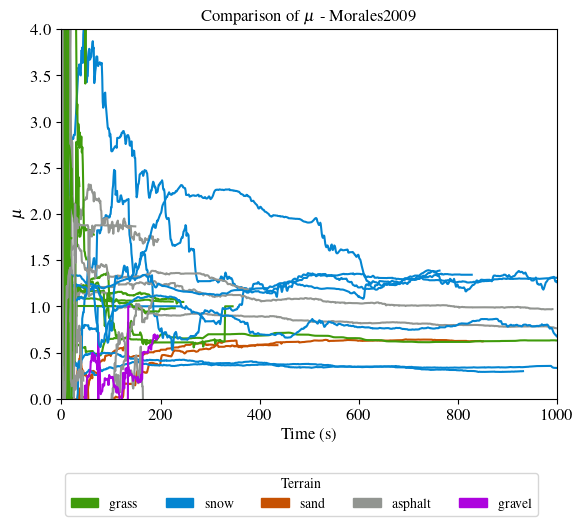

In [8]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    ax.plot(dfs[abbr].time_rel, dfs[abbr].m_asym, col, label=abbr)
ax.set_ylim((0, 4))
ax.set_xlim((0, 1000))
add_terrain_legend(fig)
ax.set_xlabel("Time (s)")
ax.set_ylabel("$\mu$")
ax.set_title(f"Comparison of $\mu$ - {model_name}")

fig.savefig(figdir / f"{model_name}_amu.jpg", bbox_inches="tight")

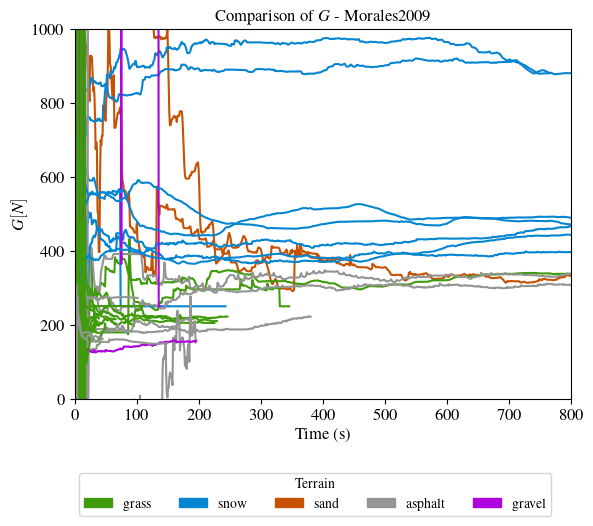

In [9]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    ax.plot(dfs[abbr].time_rel, dfs[abbr].G_asym, col, label=abbr)
ax.set_xlim((0, 800))
ax.set_ylim((0, 1000))
add_terrain_legend(fig)
ax.set_xlabel("Time (s)")
ax.set_ylabel("$G [N]$")
ax.set_title(f"Comparison of $G$ - {model_name}")

fig.savefig(figdir / f"{model_name}_aG.jpg", bbox_inches="tight")